# KNN Regression

I had pretty bad R-squared values for these models, but I am not sure where in my code I went wrong. Are my X values that I fit my regression model on correct? 

## Feedback

First of all, I think this line
Y = [(x, x) for x in music.bpm.values] 
is not correct, Y should be only target variable not a tuple with repeated values. I know it is giving an error but that error is while plotting but not while training your model. You need to fix your code for plotting to remove this error.

For the problem, your approach should be
- Train your model with different K values for both weighing and not and record accuracy. Also, check if normalizing help improving accuracy.
- Find out best K value and weighting then see if you can create some features from the given features that can help. Again plotting features will come for help here.

## Exploring Data

In [49]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import neighbors
from itertools import product
from sklearn.model_selection import cross_val_score
%matplotlib inline

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

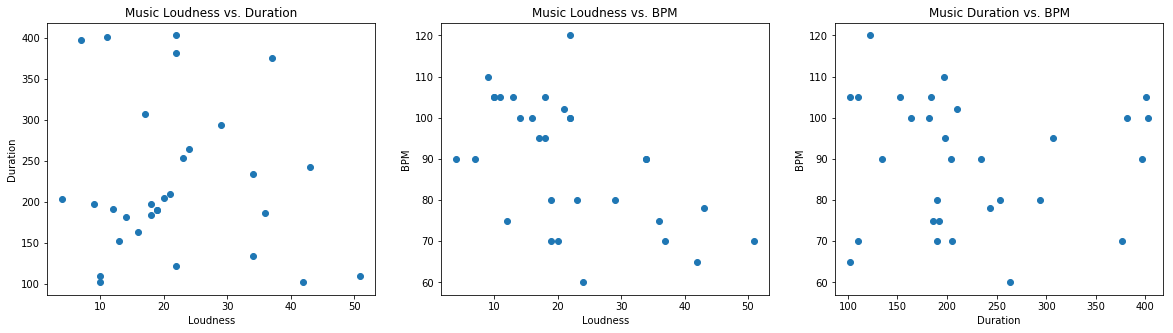

In [64]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.title('Music Loudness vs. Duration')
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.scatter(music[['loudness']].values, music[['duration']].values)

plt.subplot(132)
plt.title('Music Loudness vs. BPM')
plt.xlabel('Loudness')
plt.ylabel('BPM')
plt.scatter(music[['loudness']].values, music[['bpm']].values)

plt.subplot(133)
plt.title('Music Duration vs. BPM')
plt.xlabel('Duration')
plt.ylabel('BPM')
plt.scatter(music[['duration']].values, music[['bpm']].values)

plt.show()

## Unweighted Models, Non-Normalized Data

KNN model with K =  3


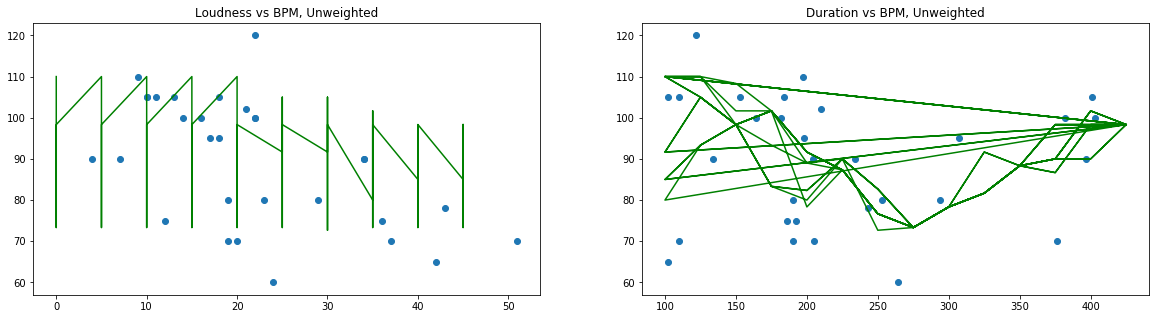

Unweighted accuracy: -0.69 (+/- 1.03)



KNN model with K =  5


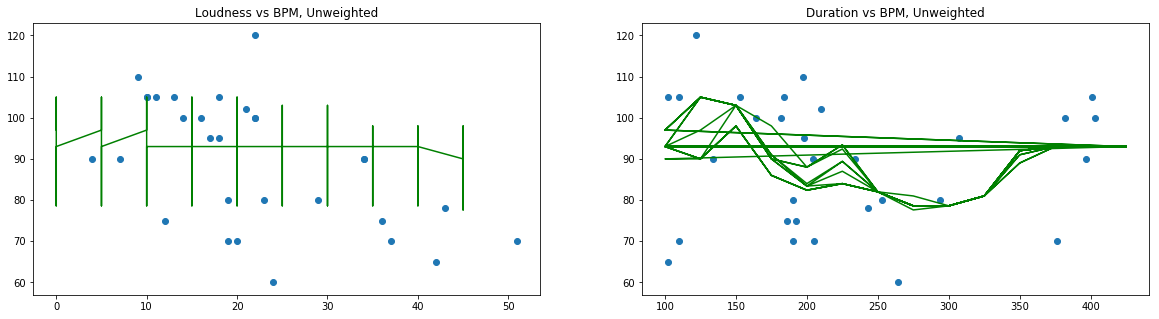

Unweighted accuracy: -0.75 (+/- 1.16)



KNN model with K =  10


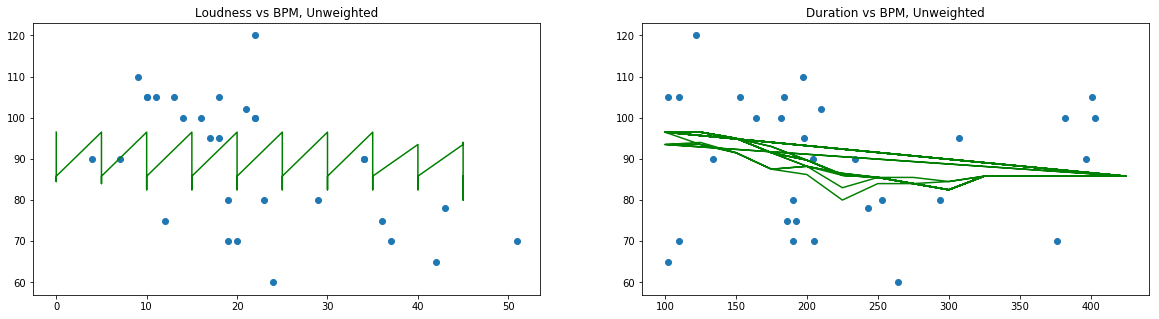

Unweighted accuracy: -0.42 (+/- 0.78)



KNN model with K =  15


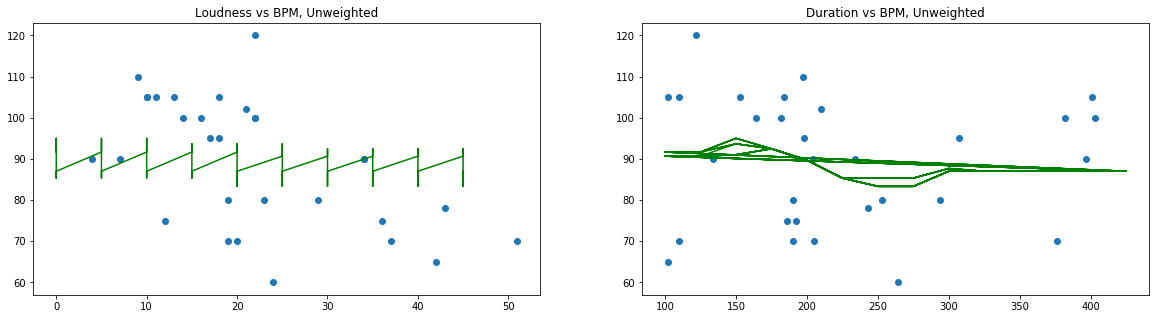

Unweighted accuracy: -0.38 (+/- 0.65)





In [66]:
def knn_model(k, music_df):
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    X = music_df[['loudness', 'duration']].values  
    Y = [x for x in music_df.bpm.values]
    knn.fit(X, Y)

    # TODO: CHANGE SO YOU CAN SEE NORMALIZED DATA ON GRAPH
    PREDICT_LOUDNESS = np.arange(0, 50, 5) # max and min of music_df['loudness'] ; divide by 10?
    PREDICT_DURATION = np.arange(100, 450, 25) # max and min of music_df['duration'] ; divide by 20? 
    T = [[x, y] for x in PREDICT_LOUDNESS for y in PREDICT_DURATION]

    Y_ = knn.predict(T)
    
    print('KNN model with K = ', k)
    
    plt.figure(figsize=(20,5))

    plt.subplot(121)
    plt.scatter(music_df[['loudness']].values, Y)
    plt.plot(list(map(lambda x: x[0], T)), Y_, c='g')
    plt.title('Loudness vs BPM, Unweighted')

    plt.subplot(122)
    plt.scatter(music_df[['duration']].values, Y)
    plt.plot(list(map(lambda x: x[1], T)), Y_, c='g')
    plt.title('Duration vs BPM, Unweighted')
    plt.show()
    
    score = cross_val_score(knn, X, Y, cv=5)
    print("Unweighted accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
    print('\n\n')

knn_model(3, music)
knn_model(5, music)
knn_model(10, music)
knn_model(15, music)

## Weighted Models, Non-Normalized Data

Now, we will run the same KNN models, but with weighted predictions.

KNN model with K =  5


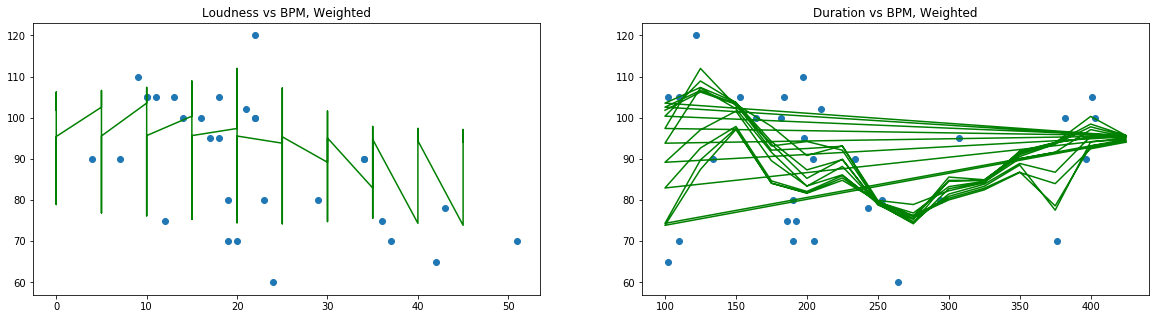

Weighted accuracy: -0.51 (+/- 1.24)



KNN model with K =  10


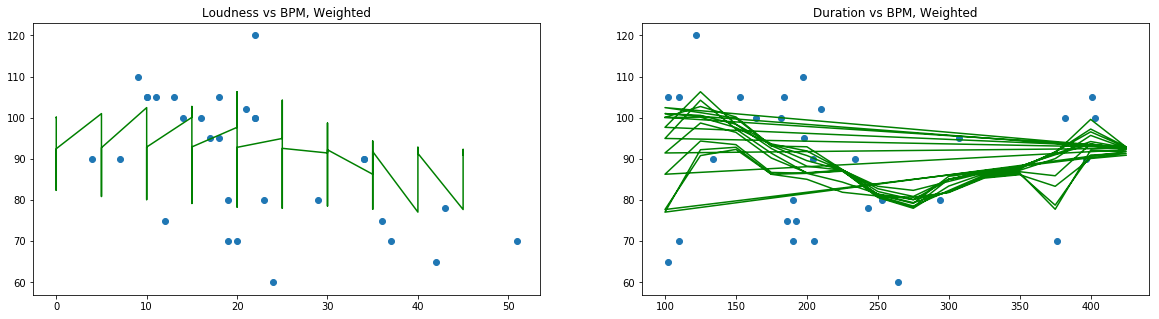

Weighted accuracy: -0.26 (+/- 0.74)



KNN model with K =  15


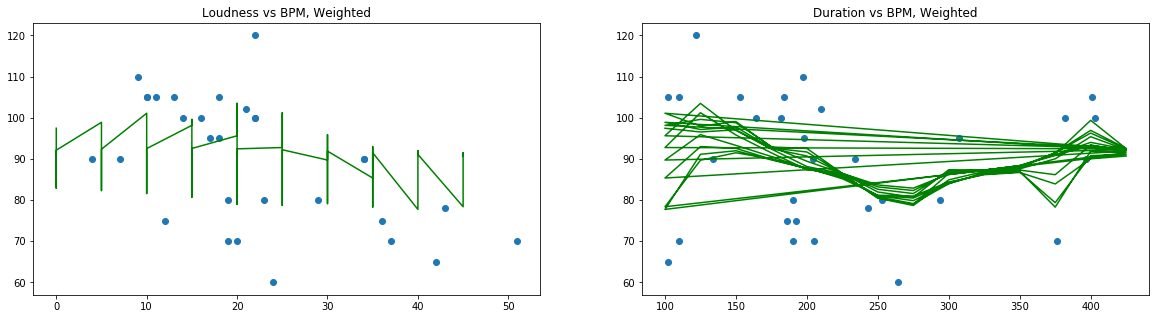

Weighted accuracy: -0.23 (+/- 0.61)





In [65]:
def knn_model_weighted(k, music_df):
    knn = neighbors.KNeighborsRegressor(n_neighbors=k, weights="distance")
    X = music_df[['loudness', 'duration']].values  
    Y = [x for x in music_df.bpm.values]
    knn.fit(X, Y)

    PREDICT_LOUDNESS = np.arange(0, 50, 5)
    PREDICT_DURATION = np.arange(100, 450, 25)
    T = [[x, y] for x in PREDICT_LOUDNESS for y in PREDICT_DURATION]

    Y_ = knn.predict(T)
    
    print('KNN model with K = ', k)
    
    plt.figure(figsize=(20,5))

    plt.subplot(121)
    plt.scatter(music_df[['loudness']].values, Y)
    plt.plot(list(map(lambda x: x[0], T)), Y_, c='g')
    plt.title('Loudness vs BPM, Weighted')

    plt.subplot(122)
    plt.scatter(music_df[['duration']].values, Y)
    plt.plot(list(map(lambda x: x[1], T)), Y_, c='g')
    plt.title('Duration vs BPM, Weighted')
    plt.show()
    
    score = cross_val_score(knn, X, Y, cv=5)
    print("Weighted accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
    print('\n\n')

knn_model_weighted(5, music)
knn_model_weighted(10, music)
knn_model_weighted(15, music)

## Normalization

Our accuracy levels are still pretty low (negatives), so we will normalize the data first before creating the model.

In [67]:
music_norm = (music - music.min()) / (music.max() - music.min()) # 0 ~ 1 

# TODO: (try normalization scaling as well)
music_norm.head()

,duration,loudness,bpm
0,0.272425,0.297872,0.75
1,0.106312,0.638298,0.50
2,0.468439,0.829787,0.30
3,0.279070,0.680851,0.25
4,0.066445,0.382979,1.00


KNN model with K =  5


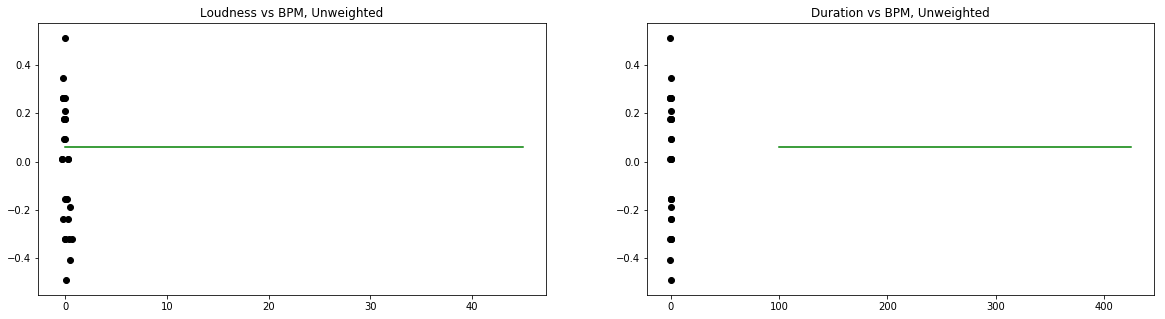

Unweighted accuracy: -0.17 (+/- 0.69)



KNN model with K =  10


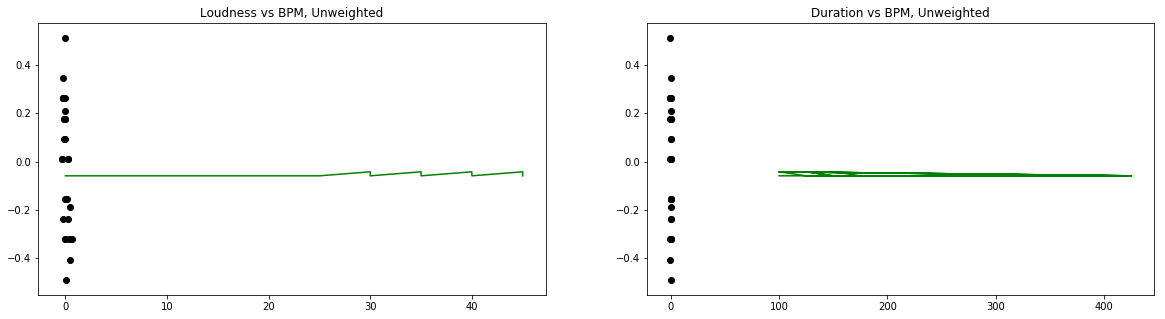

Unweighted accuracy: -0.19 (+/- 0.62)



KNN model with K =  15


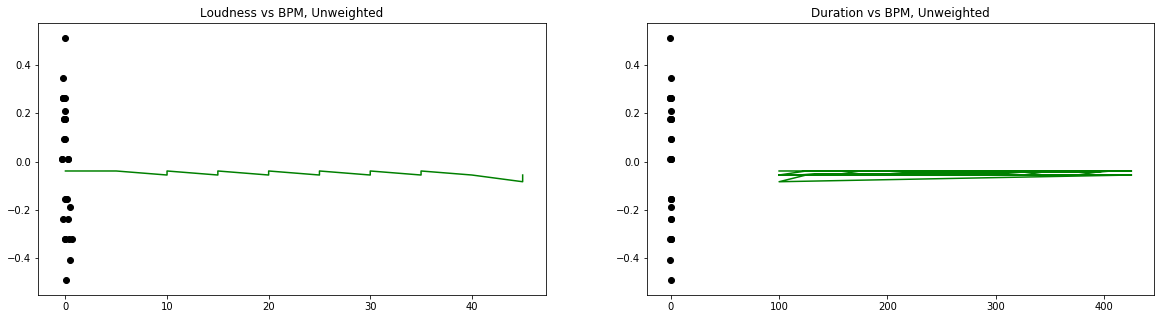

Unweighted accuracy: -0.20 (+/- 0.42)





In [60]:
knn_model(5, music_norm)
knn_model(10, music_norm)
knn_model(15, music_norm)

KNN model with K =  5


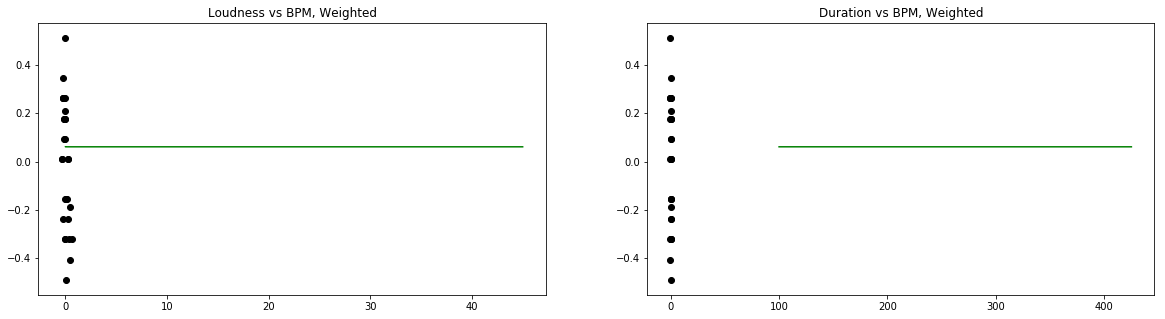

Weighted accuracy: -0.35 (+/- 1.60)



KNN model with K =  10


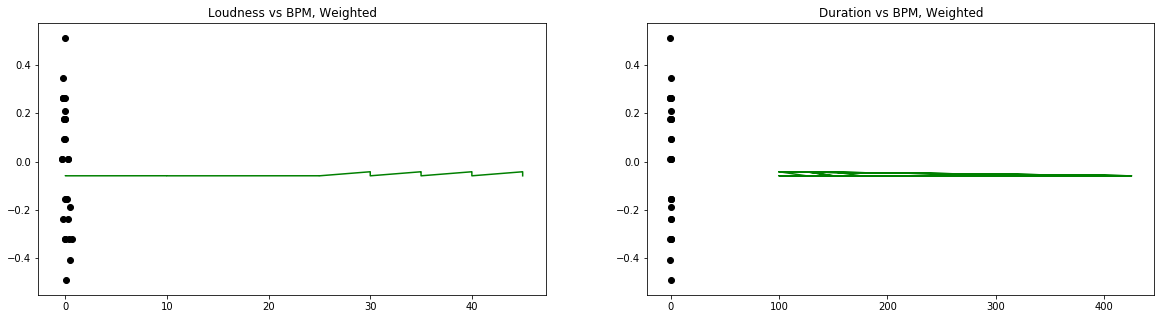

Weighted accuracy: -0.17 (+/- 1.11)



KNN model with K =  15


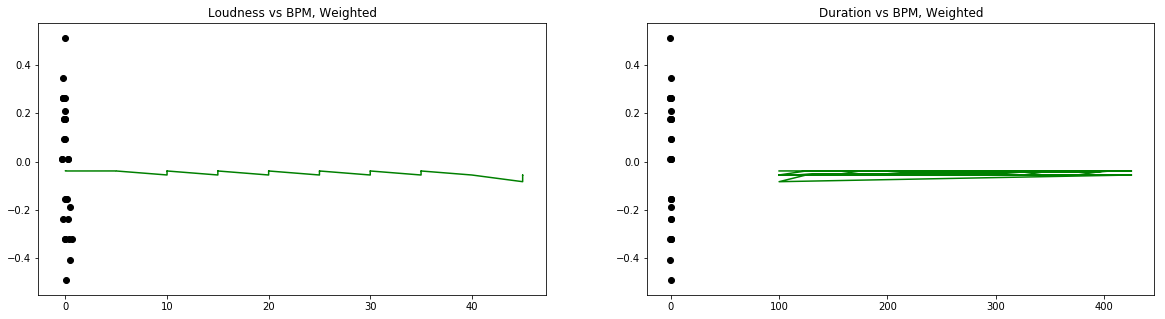

Weighted accuracy: -0.13 (+/- 0.88)





In [61]:
knn_model_weighted(5, music_norm)
knn_model_weighted(10, music_norm)
knn_model_weighted(15, music_norm)

## Evaluating Models